In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

<img src="http://www.recursionpharma.com/uploads/9/4/2/1/942150/1419038213.png">

# How this evaluation works and contents.

We'll ask you to do a few things: answer questions (just using prose) and perform analyses using code you'll write. For the code, you can either provide your own version of this jupyter notebook showing the changes and analysis, or provide your code and any results and visualizations in any other format you like, as long as it's easy for us to read. You don't have a lot of time, but the setup and guidelines are important. Feel free to skim the exercise objectives first if you want.

Contents:

- Setup
    - The dataset
    - Green labels infected cells
- Meta instructions
    - What we're looking for
    - Tips and Guidelines
- Objectives

# Setup

### The dataset

In [5]:
import pandas as pd
cells = pd.read_csv('cell_infection.csv')

Recently, we conducted a biological imaging experiment in which we incubated human cells alongside an infectious virus, then applied various colors of dye that dye various aspects of the cells, then imaged the dyed cells with a microscope. 

The data we collected is found in `cell_infection.csv`.  Each row represents a single cell, and the columns consist of a few hundred attributes of each cell calculated from the images. The experiment was conducted in 56 independent "wells" of a cell culture plate (seen below), where there were hundreds of cells in each well.  The column `well_name`  is an identifier of the well in which each cell was incubated.

<img src="http://cosmobrand.com/files/image/PCR%20384-1.jpg">

In [13]:
df_feats = pd.DataFrame.from_csv('cell_infection.csv', index_col=None)
# If you're unfamiliar with pandas, you can opt for using the 2-d array if you prefer:
# features = df_feats.columns
# arr_feats = df_feats.values 
print(len(df_feats), "cells total.")
df_feats.head()

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


(33239, 'cells total.')


,well_name,AreaShape_Area_nucleus,AreaShape_Compactness_nucleus,AreaShape_Eccentricity_nucleus,AreaShape_EulerNumber_nucleus,AreaShape_Extent_nucleus,AreaShape_FormFactor_nucleus,AreaShape_MajorAxisLength_nucleus,AreaShape_MaxFeretDiameter_nucleus,AreaShape_MaximumRadius_nucleus,...,Texture_SumVariance_OrigRed_3_0_cell,Texture_SumVariance_OrigRed_5_0_cell,Texture_Variance_OrigBlue_3_0_cell,Texture_Variance_OrigBlue_5_0_cell,Texture_Variance_OrigFRed_3_0_cell,Texture_Variance_OrigFRed_5_0_cell,Texture_Variance_OrigGreen_3_0_cell,Texture_Variance_OrigGreen_5_0_cell,Texture_Variance_OrigRed_3_0_cell,Texture_Variance_OrigRed_5_0_cell
0,B20,568.0,1.572550,0.908897,1.0,0.466338,0.508937,44.022552,45.650848,9.899495,...,15.179914,13.584163,3.477151,3.281005,1.585831,1.549546,2.197752,2.092333,4.005200,3.784434
1,B20,799.0,1.288395,0.859880,1.0,0.553708,0.614360,45.601234,43.185646,11.401754,...,15.625304,14.792062,3.534281,3.619071,1.833969,1.768109,3.118020,3.162750,4.299676,4.348104
2,B20,1803.0,1.008927,0.296146,1.0,0.735918,0.873196,49.191647,50.695168,22.203604,...,18.900076,18.815178,4.836779,4.939890,1.518513,1.554327,2.043054,2.089011,4.906641,5.034640
3,B20,1492.0,1.085024,0.674097,1.0,0.611977,0.708225,51.622520,54.129475,17.204651,...,20.552971,19.974369,6.800814,6.814454,1.254165,1.067071,2.561560,2.488768,5.140226,5.011926
4,B20,2855.0,1.019901,0.482408,1.0,0.784341,0.834932,64.712669,64.776543,26.570660,...,16.527992,16.257439,6.314425,6.333607,1.474461,1.449317,2.338653,2.353401,4.262483,4.287000


### Green labels infected cells

As part of the infection experiment, we applied a green dye that specifically targets cellular components that are affected by infection. See the provided png image of one particular well, which contained on the order of a thousand of the cells. In the image, each blue dot marks the nucelus of a single cell.  A subset of the cells in the image have a green tint, indicating that the cell was infected by the virus. If the contrast isn't coming through well for you, don't worry about it and just take our word for it.

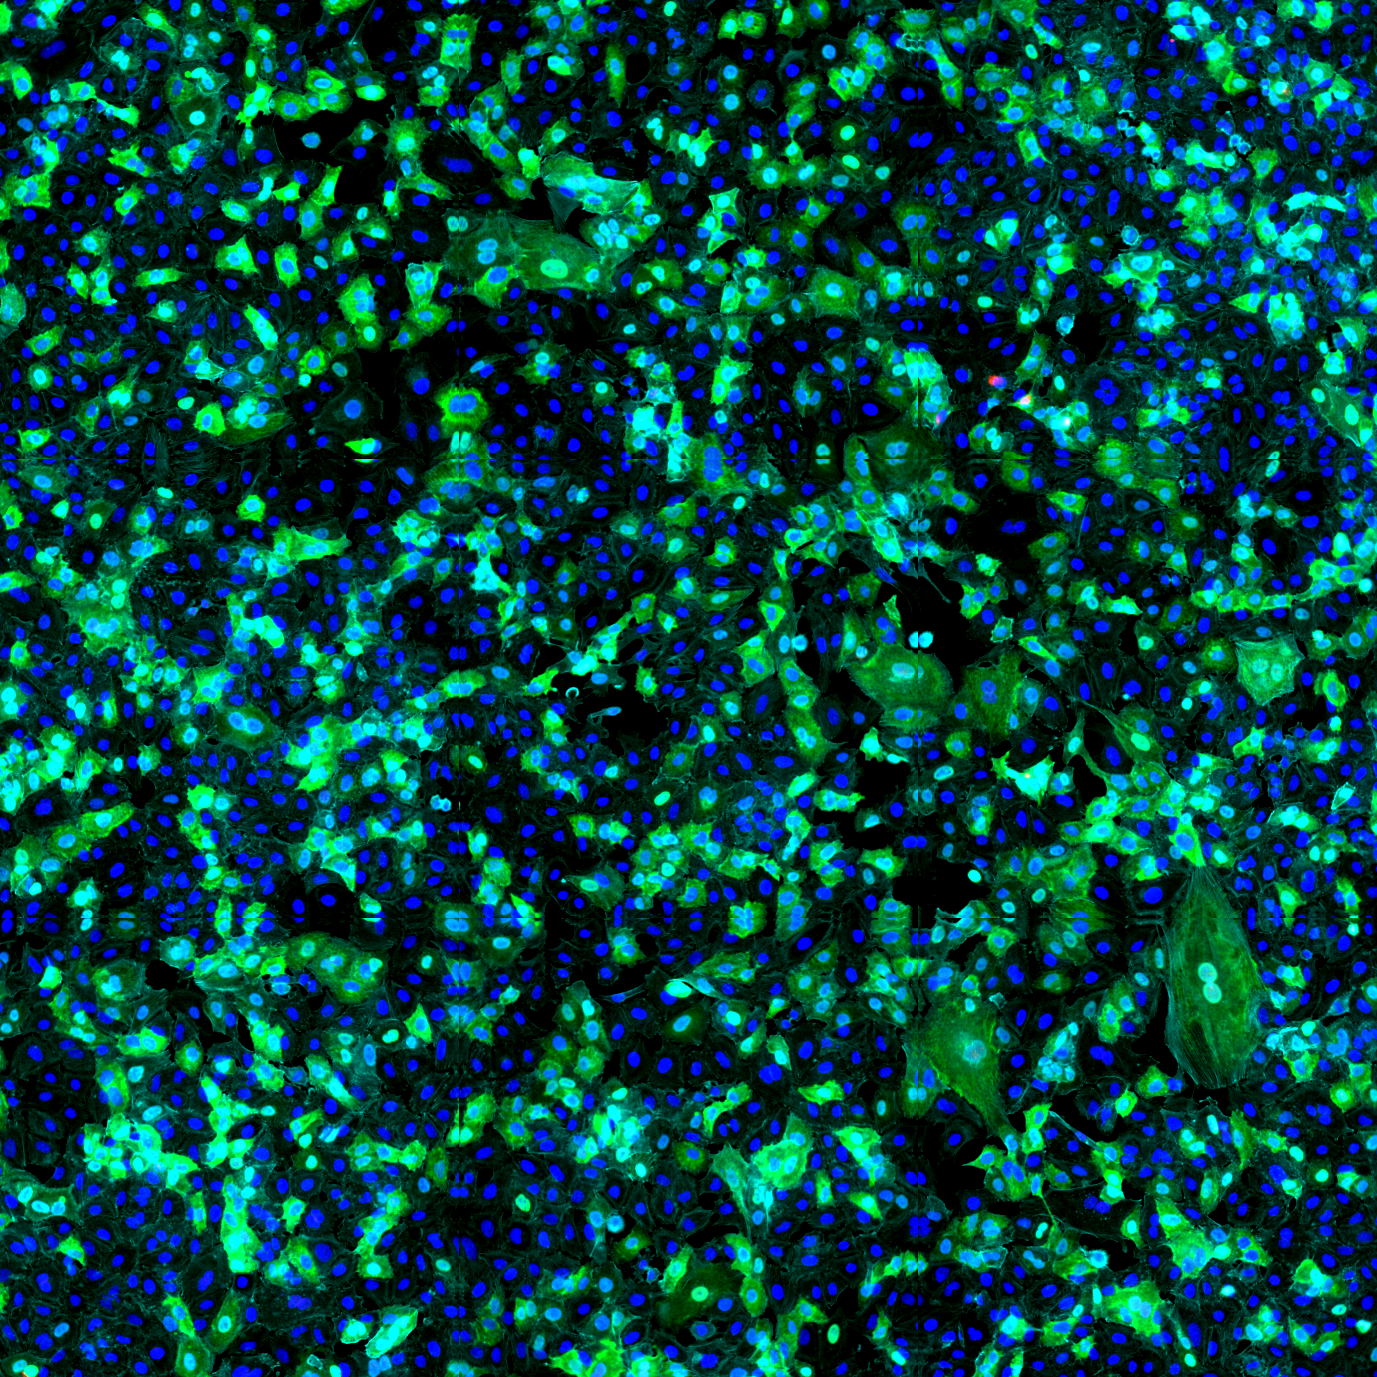

In [7]:
from IPython.display import Image
Image('aldrin_f22_rescaled.png', width=700, height=700)

From the image above, it's clear we have a bi-modal distribution of the green dye: most cells having very little to no green (non-infected), with some cells having a lot of it (infected).

Our software has extracted hundreds of features from these images. Those with the word "Green" in them are features pertaining to the green dye that signals infection. We have identified for you a single feature:

`Intensity_MedianIntensity_OrigGreen_nucleus`

Which you can use to represent the intensity of green.  High values of this feature should correspond to infected cells.  Low values of this feature correspond to uninfected cells.

# Guidelines

### What we're looking for

The work sample consists of four questions about the data provided. Your job is to answer the questions in a way that is most persuasive that you've answered the questions thoroughly and correctly (for a first pass and given the limited time.) The audience for your analysis is a group of scientists and engineers with a level of technical sophistication but not necessarily a mastery of probability and statistics, so use a level of explanation appropriate to that audience.

*Each question is given equal weight in the final score,* so in the absence of time to complete a question fully, it may be worthwhile to at least describe what approach you would take to solve it.

80% of your score will be based on your answers to the four questions, and 20% on the overall clarity of your code and the effectiveness of your communication.  

In particular, we are looking for:
- Clear, concise **code**
- In-line concise **documentation** where appropriate
- Clear, interpretable **visualizations** where useful
- **Caveats** to your method (including assumptions you are making), 
- **Alternative approaches** you could take with additional time.

### Rules of the game

1. You can submit results however is convenient for you, as long as we can read it easily. Just make sure we have your code plus any visualizations and explanations.
2. Don't get hung up on using a Jupyter notebook or even python if you're way more comfortable using something else. That's why the data is available as a csv. Python is preferred, but use the tools that best enable you to demonstrate your effectiveness as a data scientist.
3. Googling. Feel free to scour the web for tips as you normally would at work. But for the sake of fairness, please don’t get any direct assistance with any of the exercises.
4. Sharing. While it’s not top-secret data, it is proprietary, and we’d very much appreciate it if you don’t share it with anyone or put it anywhere publicly accessible.
5. Bugs, questions, misunderstandings. Email me if something critical happens, but there's a good chance I won't be able to get to it in time. So if it seems like something's wrong, please make a note of it for me, and do the best you can.


# Objectives

1) We believe that an experimental error may have occured and that some **wells** may not have received any virus
- Identify any suspect wells that may not have received any virus (remember wells are identified by row letters and column numbers, e.g. 'B20')
- Share any visualizations that may be helpful to support your decisions. 
- Remove any suspect wells from further analysis.
   
2) A reasonable threshold to use to separate the infected cells from non-infected cells is $0.03$ for the feature: *Intensity_MedianIntensity_OrigGreen_nucleus*. For the rest of the exercise, we will consider this our source of truth; cells with values higher than 0.03 for that feature should be considered infected.  Cells with lower than that are uninfected. A biologist wants to know what single **non-green feature** is most affected by the virus. 
- Identify the *non-green* feature (i.e., excluding all features containing the word "Green") that best separates infected cells from noninfected cells for some meaningful measure. Visualize the distribution of values for the two groups for that feature. Are there any caveats to your method or other approaches you could take?
    
3) A coworker points out that even a random split of cells into two groups would allow you to calculate a "most separable" feature according to your method in #2.  So now that you've selected a non-green feature that appears to provide the best separability, how sure are you that the feature is actually affected by the virus? Imagine you need to report how confident you are in your feature to your coworker. (Your coworker distrusts p values that are automatically generated by statistical tests).
-  For whatever separability method you selected in question 2, describe a null model that would convey to your coworker how likely the feature is to actually be affected by the virus. You don't need to implement it for this question; the main point is to describe the right approach.

4) Using only the feature you identified in question 2, let's find a threshold value that best classifies whether cells are infected or not. The classifier will be a single threshold value of that feature, so you should not need to use any machine learning libraries for this part. As before, we will consider the original >0.03 on *Intensity_MedianIntensity_OrigGreen_nucleus* to be the ground truth identifier 
of infection. 
- Find the threshold value of your selected non-green feature that optimizes the classification of infected vs non-infected cells according to some metric of your choosing. Briefly justify your choice of metric. Are there any caveats?

## Question 1

In [69]:
def intensity_agg(intensity):
    return (intensity > 0.03).sum()        

intensity_grouped = df_feats[['well_name', 'Intensity_MedianIntensity_OrigGreen_nucleus']
                            ].groupby('well_name').aggregate([intensity_agg, 'count'], axis=1).reset_index()
intensity_grouped.columns = ['wells', 'cells_infected', 'total_cells']
intensity_grouped['percent'] = intensity_grouped['cells_infected']/intensity_grouped['total_cells']
intensity_grouped_sorted = intensity_grouped.sort_values('percent', ascending=True)

In [80]:
suspect_wells = intensity_grouped_sorted[intensity_grouped_sorted['cells_infected'] == 0.0]['wells'].tolist()

I ordered the wells in a way that not infected cells appear on the top based on the percentage of cells infected in each well.

In [81]:
suspect_wells

['B20',
 'O21',
 'N23',
 'M23',
 'L23',
 'K23',
 'J23',
 'I23',
 'O22',
 'G23',
 'F23',
 'E23',
 'H23',
 'O23',
 'D23',
 'B21',
 'C23']

### Question 2
 - ground truth threshold value = 0.03
 - Best non-green feature ?

In [93]:
df_feats.columns

Index([u'well_name', u'AreaShape_Area_nucleus',
       u'AreaShape_Compactness_nucleus', u'AreaShape_Eccentricity_nucleus',
       u'AreaShape_EulerNumber_nucleus', u'AreaShape_Extent_nucleus',
       u'AreaShape_FormFactor_nucleus', u'AreaShape_MajorAxisLength_nucleus',
       u'AreaShape_MaxFeretDiameter_nucleus',
       u'AreaShape_MaximumRadius_nucleus',
       ...
       u'Texture_SumVariance_OrigRed_3_0_cell',
       u'Texture_SumVariance_OrigRed_5_0_cell',
       u'Texture_Variance_OrigBlue_3_0_cell',
       u'Texture_Variance_OrigBlue_5_0_cell',
       u'Texture_Variance_OrigFRed_3_0_cell',
       u'Texture_Variance_OrigFRed_5_0_cell',
       u'Texture_Variance_OrigGreen_3_0_cell',
       u'Texture_Variance_OrigGreen_5_0_cell',
       u'Texture_Variance_OrigRed_3_0_cell',
       u'Texture_Variance_OrigRed_5_0_cell'],
      dtype='object', length=469)

In [94]:
df_feats['y_label'] = np.where(df_feats.Intensity_MedianIntensity_OrigGreen_nucleus >= 0.03 , 1, 0)

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
non_green_features = [col for col in df_feats.columns if 'green' not in col.lower()]

In [97]:
print(len(non_green_features), len(df_feats.columns))

(376, 470)


In [98]:
X_train = df_feats[non_green_features]

In [100]:
def missing_values(df): 
    
    """
        Function to find any missing values in a dataframe 
        
        Params : 
        --------------------
        @df : input dataframe
        --------------------
    
    """
    
    
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum()/len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    return mis_val_table_ren_columns

In [104]:
missing_values(X_train)

,Missing Values,% of Total Values
well_name,0,0.0
AreaShape_Area_nucleus,0,0.0
AreaShape_Compactness_nucleus,0,0.0
AreaShape_Eccentricity_nucleus,0,0.0
AreaShape_EulerNumber_nucleus,0,0.0
AreaShape_Extent_nucleus,0,0.0
AreaShape_FormFactor_nucleus,0,0.0
AreaShape_MajorAxisLength_nucleus,0,0.0
AreaShape_MaxFeretDiameter_nucleus,0,0.0
AreaShape_MaximumRadius_nucleus,0,0.0


### Notes : 
  - Data is clean - no missing vales 
  - We can use suspect wells found in question 1 to refine training data. 

In [102]:
rfc = RandomForestClassifier(n_estimators=200,max_depth=5,n_jobs=-1)

In [103]:
suspect_wells = ['B20',
 'O21',
 'N23',
 'M23',
 'L23',
 'K23',
 'J23',
 'I23',
 'O22',
 'G23',
 'F23',
 'E23',
 'H23',
 'O23',
 'D23',
 'B21',
 'C23']

In [105]:
X_train = X_train[~X_train.well_name.isin(suspect_wells)]

In [106]:
y_train = X_train['y_label']

In [107]:
train_df = X_train.drop(['well_name','y_label'],axis=1)

In [108]:
rfc.fit(train_df[:].values,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [111]:
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(11) : 
    print('%2d) %-*s %f' % (f+1,30,non_green_features[indices[f]],importances[indices[f]]))

 1) Texture_InverseDifferenceMoment_OrigRed_5_0_nucleus 0.091020
 2) Texture_SumAverage_OrigBlue_3_0_nucleus 0.075709
 3) Intensity_MaxIntensityEdge_OrigFRed_nucleus 0.066719
 4) Intensity_IntegratedIntensityEdge_OrigBlue_nucleus 0.039387
 5) Intensity_IntegratedIntensity_OrigBlue_nucleus 0.038644
 6) Intensity_MeanIntensity_OrigBlue_nucleus 0.029019
 7) Intensity_StdIntensityEdge_OrigFRed_nucleus 0.026987
 8) Intensity_LowerQuartileIntensity_OrigFRed_cell 0.026156
 9) Intensity_UpperQuartileIntensity_OrigBlue_nucleus 0.025353
10) Intensity_MinIntensityEdge_OrigFRed_nucleus 0.022328
11) Intensity_MeanIntensityEdge_OrigFRed_nucleus 0.022228


In [112]:
features = []
imp = []
for f in range(11) : 
    features.append(non_green_features[indices[f]])
    imp.append(importances[indices[f]])

(-1, 12)

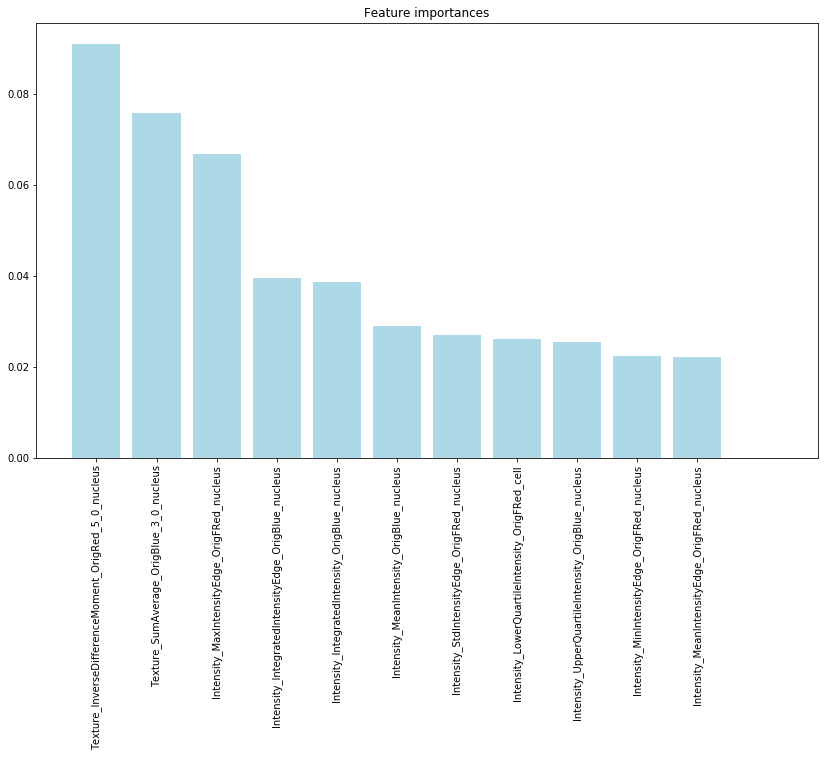

In [113]:
plt.figure(figsize=(14,8))
plt.title('Feature importances')
plt.bar(range(len(features)),
             imp,
             color='lightblue',
             align='center')
plt.xticks(range(len(features)),features,rotation=90)
plt.xlim([-1,(len(features))+1])

### Question 3

I would use Random Forest classifier to find the best feature, which employs finding the best split based on
information gain / gini index. p-values and confidence intervals can be calculated but they would only suggest 
if the feature is relevant but does not specify how important a feature is. 

The null model would be see if the weight on the feature is zero in a classification model like regression. 
The weight zero indicates that feature is not relevant and weight far away from zero iindicates that the feature 
is important

## Question 4

In [115]:
data_subset = df_feats[['Texture_InverseDifferenceMoment_OrigRed_5_0_nucleus', 'y_label']]
data_subset.groupby('y_label').describe()

Texture_InverseDifferenceMoment_OrigRed_5_0_nucleus            \
                                                      count      mean   
y_label                                                                 
0                                                  26123.0   0.600539   
1                                                   7116.0   0.603425   

                                                                     
              std       min       25%       50%       75%       max  
y_label                                                              
0        0.051345  0.293779  0.568387  0.599923  0.632620  0.930433  
1        0.051957  0.237773  0.572541  0.601181  0.633151  0.893830

In [116]:
data_subset = df_feats[['Texture_SumAverage_OrigBlue_3_0_nucleus', 'y_label']]
data_subset.groupby('y_label').describe()

Texture_SumAverage_OrigBlue_3_0_nucleus                                \
                                          count      mean       std       min   
y_label                                                                         
0                                       26123.0  9.485107  0.827552  3.334370   
1                                        7116.0  8.604159  0.924584  3.904142   

                                                   
              25%       50%        75%        max  
y_label                                            
0        9.031328  9.561334  10.038636  12.683841  
1        8.010266  8.646917   9.220480  12.435028

These are the top 2 features from random forest model in the question. I would use weight average of means of each label to calculate threshold, where my weights are the costs associated with the misclassification.

I would say the feature Texture_InverseDifferenceMoment_OrigRed_5_0_nucleus is important than Texture_SumAverage_OrigBlue_3_0_nucleus because the standard deviation is less in it compared to the other eventough the means are close by.